<a href="https://colab.research.google.com/github/bassoline/DeepLearning/blob/main/MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Note this is just for practice - normally CNN would be used to solve this problem 

In [ ]:
import torch.nn as nn 
import torch.optim as optim 
import torch 

from torchvision import datasets 
from torchvision import transforms 
from torch.utils.data import DataLoader

In [ ]:
# Define the NN Module 
"""
For a classifier, the output layer should have softmax activation. 
However, we are using linear activation. 
This is because during training we will use nn.CrossEntropyLoss 
that combines nn.LogSoftMax (Log of SoftMax) 
and nn.NLLLoss (Negative Log Likelihood Loss). 
This also means that when we do inference, 
we have to use nn.functional.softmax on the raw 
output to convert it to probabilities.
"""
class MLP(torch.nn.Module): 
  def __init__(self): 
    # initalize super class 
    super().__init__()
    # build model 
    self.model = nn.Sequential(
        # add input layer 28*28 to match image dimensions
        # 512 nodes in the layer
        nn.Linear(28*28, 512),
        # activation function for non-linearity
        nn.ReLU(),
        # second layer 
        nn.Linear(512, 512),
        nn.ReLU(),
        # output layer
        nn.Linear(512, 10)
    )

  def forward(self, x):
    # forward pass 
    return self.model(x)
  

In [ ]:
def train(model, train_loader, loss_function):
  model.train()
  running_loss = 0
  running_correct = 0

  for (x_train, y_train) in train_loader:
    #Forward pass 
    
    # flatten image to 1-D 
    x_train = x_train.view(x_train.shape[0], -1)
    
    # compute predicted y 
    y = model(x_train)

    # compute and print loss 
    loss = loss_function(y, y_train)
    running_loss += loss.item()

    # compute accuracy 
    y_pred = y.argmax(dim=1)
    correct = torch.sum(y_pred==y_train)
    running_correct += correct 

    # zero gradients for back prop 
    optimizer.zero_grad()
    # calculate backprop 
    loss.backward()
    # update model weights 
    optimizer.step()
  
  return running_loss/len(train_loader), running_correct.item() / len(train_loader.dataset)


In [ ]:
def val(model, validation_loader, loss_function):
  model.eval()
  running_loss = 0 
  running_correct = 0 

  # since we're only doing forward pass we don't need the overhead of gradients 
  with torch.no_grad():
    for (x_val, y_val) in validation_loader: 
      #Forward pass 
    
      # flatten image to 1-D 
      x_val = x_val.view(x_val.shape[0], -1)
      
      # compute predicted y 
      y = model(x_val)

      # change score to probablity using softmax 
      prob = nn.functional.softmax(y, dim=1)

      # compute and print loss 
      loss = loss_function(y, y_val)
      running_loss += loss.item()

      # compute accuracy 
      y_pred = prob.argmax(dim=1)
      correct = torch.sum(y_pred==y_val)
      running_correct += correct 

      return running_loss/len(validation_loader), running_correct.item()/len(validation_loader.dataset)

In [ ]:
# for reproducibility 
torch.manual_seed(0)

# batch size should be less than or equal to 32 
# see here https://twitter.com/ylecun/status/989610208497360896?lang=en
batch_size = 32 

# torch datasets can be found here 
# https://pytorch.org/docs/stable/torchvision/datasets.html
train_dataset = datasets.MNIST('./data', 
                               train=True,
                               download=True,
                               transform=transforms.ToTensor())
validation_dataset = datasets.MNIST('./data',
                                    train=False,
                                    transform=transforms.ToTensor())


# FYI for Dataloader
# it shuffles data and loads data in mini-batches 
train_loader = DataLoader(dataset = train_dataset, 
                          batch_size = batch_size,
                          shuffle=True)
validation_loader = DataLoader(dataset = validation_dataset, 
                          batch_size = batch_size,
                          shuffle=False)


In [ ]:
# configure training parameters and initalize model 
num_epochs = 20 
model = MLP()
loss_function = nn.CrossEntropyLoss() 
optimizer = optim.SGD(model.parameters(), lr=1e-2)

# initialize training history 
train_loss_history = [] 
val_loss_history = []
train_acc_history = [] 
val_acc_history = [] 

# train 
print('Start training')
for epoch in range(num_epochs): 
  train_loss, train_acc = train(model, train_loader, loss_function) 
  val_loss, val_acc = val(model, validation_loader, loss_function) 
  print("Epoch: {}, Train Loss = {:.3f}, Train Acc = {:.3f} , Val Loss = {:.3f}, Val Acc = {:.3f}".
          format(epoch, train_loss, train_acc, val_loss, val_acc))
  train_loss_history.append(train_loss)
  val_loss_history.append(val_loss)
  train_acc_history.append(train_acc)
  val_acc_history.append(val_acc)

Start training
Epoch: 0, Train Loss = 1.042, Train Acc = 0.753 , Val Loss = 0.001, Val Acc = 0.003
Epoch: 1, Train Loss = 0.358, Train Acc = 0.899 , Val Loss = 0.001, Val Acc = 0.003
Epoch: 2, Train Loss = 0.293, Train Acc = 0.915 , Val Loss = 0.001, Val Acc = 0.003
Epoch: 3, Train Loss = 0.253, Train Acc = 0.928 , Val Loss = 0.001, Val Acc = 0.003
Epoch: 4, Train Loss = 0.220, Train Acc = 0.937 , Val Loss = 0.001, Val Acc = 0.003
Epoch: 5, Train Loss = 0.194, Train Acc = 0.945 , Val Loss = 0.001, Val Acc = 0.003
Epoch: 6, Train Loss = 0.173, Train Acc = 0.951 , Val Loss = 0.001, Val Acc = 0.003
Epoch: 7, Train Loss = 0.155, Train Acc = 0.956 , Val Loss = 0.001, Val Acc = 0.003
Epoch: 8, Train Loss = 0.140, Train Acc = 0.960 , Val Loss = 0.001, Val Acc = 0.003
Epoch: 9, Train Loss = 0.128, Train Acc = 0.963 , Val Loss = 0.000, Val Acc = 0.003
Epoch: 10, Train Loss = 0.117, Train Acc = 0.967 , Val Loss = 0.000, Val Acc = 0.003
Epoch: 11, Train Loss = 0.107, Train Acc = 0.970 , Val Loss 

Text(0.5, 1.0, 'Accuracy Curve')

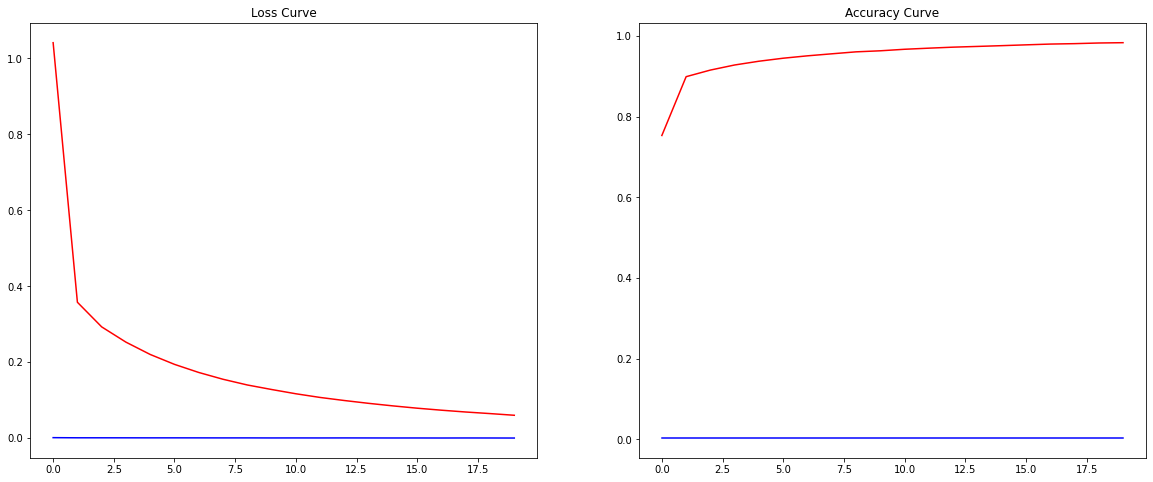

In [ ]:
# plot the results 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.figure(figsize=[20,8])
plt.subplot(121)
plt.plot(train_loss_history,'r')
plt.plot(val_loss_history,'b')
plt.title("Loss Curve")

plt.subplot(122)
plt.plot(train_acc_history,'r')
plt.plot(val_acc_history,'b')
plt.title("Accuracy Curve")


Predicted class 7 with probability 0.9978142976760864


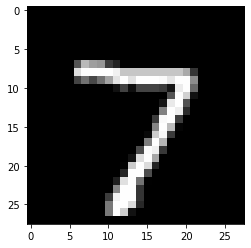

In [ ]:
# perform Inference
images, labels = next(iter(validation_loader))
plt.imshow(images[0][0], 'gray')
# resize image to 1-D
images.resize_(images.shape[0], 1, 784)
# forward pass 
score = model(images[0,:])
# softmax for classification
prob = nn.functional.softmax(score[0], dim=0)
# get prediction 
y_pred =  prob.argmax()
print("Predicted class {} with probability {}".format(y_pred, prob[y_pred]))